- Hacer una exploración inicial del dataframe.

    - ¿Cuántas filas tiene?

    - ¿Cuántas nulos tiene?

    - ¿Y duplicados?

    - ¿Qué tipo de datos tenemos en el dataframe?etc.


- Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

- Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.


In [20]:
import pandas as pd 
import seaborn as sns
import numpy as np
from scipy.stats import skew
import scipy.stats as st
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('../datos/imdb_top_1000.csv') 

In [22]:
df.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [23]:
df.info() # sacamos la información pricipal: tipo de datos, columnas, nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [24]:
columnas_nuevas = {col:col.lower() for col in df.columns} # renombramos las columnas
df.rename(columns=columnas_nuevas, inplace= True)

In [25]:
print(f'El DataFrame tiene {df.size } filas') 

El DataFrame tiene 16000 filas


In [26]:
print(f'El DataFrame tiene {df.duplicated().sum() } duplicados') 

El DataFrame tiene 0 duplicados


Preguntas: 

    - En qué año se han estrenado más películas?

    - Películas con mejor y peor valoración 

    - Valoración media de las películas comedia

    - Película más valorada de la actriz Audrey Hepburn

    - Relación de la películas entre la valoración y la recaudación

    
    

- En qué año se han estrenado más películas?

In [27]:
año = df['released_year'].mode()[0]
print( f'En el {año} se estrenaron más películas')

En el 2014 se estrenaron más películas


- Películas con mejor y peor valoración 

In [28]:
mejor_rating = df['imdb_rating'].max()
mejor_pelicula = df[df['imdb_rating']==mejor_rating]['series_title'][0]
print(f'La mejor película es {mejor_pelicula} con una puntuacion de {mejor_rating}')

La mejor película es The Shawshank Redemption con una puntuacion de 9.3


In [29]:
peor_rating = df['imdb_rating'].min()
print(f'Las películas peor valoradas tienen  una puntuacion de {peor_rating}')

Las películas peor valoradas tienen  una puntuacion de 7.6


 - Valoración media de las películas comedia

In [30]:
comedia= df[df['genre']=='Comedy']
media_comedia = comedia['imdb_rating'].mean()
mediana_comedia = comedia['imdb_rating'].median()
moda_comedia = comedia['imdb_rating'].mode()[0]
print(f' La media de las peliculas de género comedia es: {media_comedia}, la mediana es {mediana_comedia} y la moda es {moda_comedia}')

 La media de las peliculas de género comedia es: 7.823076923076924, la mediana es 7.7 y la moda es 7.7


Deducimos de estas métricas que las películas de género comedia no están muy bien valoradas por la Web, ya que su la media su valoración está cerca de la puntuación más baja de todo el conjunto de datos.

- Película más valorada de la actriz Audrey Hepburn

In [31]:
peliculas_Hepburn = df[df['star1'] =='Audrey Hepburn']
peliculas_Hepburn

,poster_link,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
700,https://m.media-amazon.com/images/M/MV5BMTQyNT...,Wait Until Dark,1967,NaN,108 min,Thriller,7.8,A recently blinded woman is terrorized by a tr...,81.0,Terence Young,Audrey Hepburn,Alan Arkin,Richard Crenna,Efrem Zimbalist Jr.,27733,"17,550,741"
703,https://m.media-amazon.com/images/M/MV5BNGM0ZT...,My Fair Lady,1964,U,170 min,"Drama, Family, Musical",7.8,Snobbish phonetics Professor Henry Higgins agr...,95.0,George Cukor,Audrey Hepburn,Rex Harrison,Stanley Holloway,Wilfrid Hyde-White,86525,"72,000,000"
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN


In [32]:
pelicula_mas_votada = peliculas_Hepburn['no_of_votes'].max()
mejor_pelicula =peliculas_Hepburn [peliculas_Hepburn['no_of_votes']==pelicula_mas_votada]['series_title']
print(f'Las película de Haudrey Hepburn más votada es {mejor_pelicula.values[0]}')

Las película de Haudrey Hepburn más votada es Breakfast at Tiffany's


Esta película es la más votada, pensamos por ser la más famosa y no por ello tiene que ser la mejor valorada por los expertos

- Relación de la películas entre la valoración y la recaudación

In [33]:
# Cambiamos el tipo de dato a 'gross' para que sea variabe numérica
def cambiar_dato(col):  
    try :
        col = col.replace(',','')
        col = float(col)
    except:
        pass
    return col

In [34]:
df['gross'] = df['gross'].apply(cambiar_dato)

/tmp/ipykernel_4006/1785872453.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


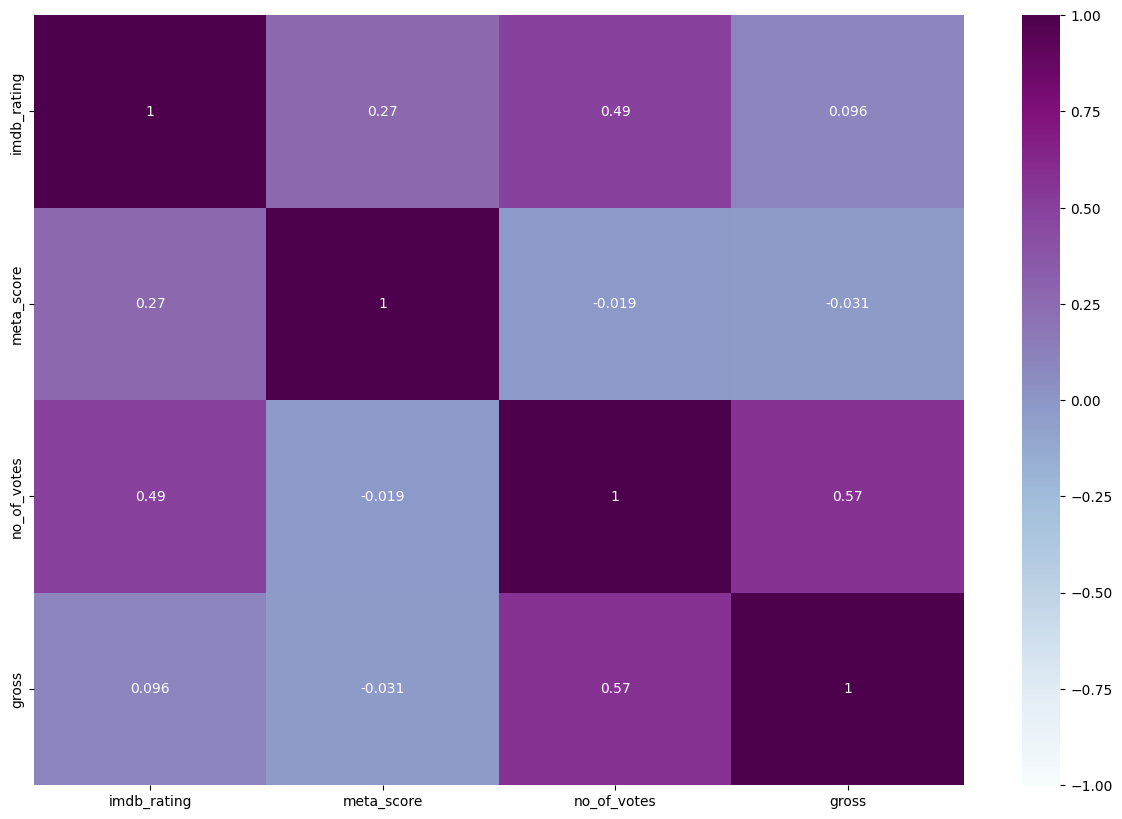

In [35]:
# Realizamos un heatmap para comprobar la correlación 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))

sns.heatmap(df.corr(), 
            cmap = "BuPu", 
            annot = True, 
            vmin = -1, 
            vmax = 1 
);

Tratamos de buscar relación entre la recaudación y la valoración. Según el heatmap no hay correlación entre estas variables.

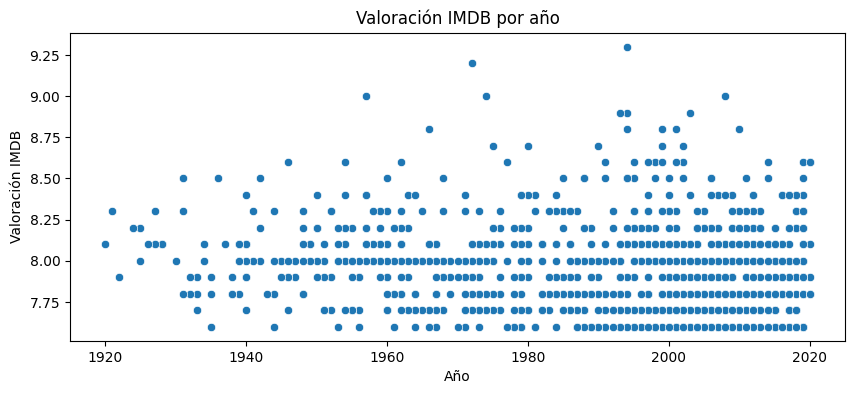

In [36]:
#Definimos la función año para cambiar a integer los valores de la columna released_year

def año(col): 
    try:
        col = int(col)
        return col
    except:
        return col

#Aplicamos la función

df['released_year'] = df['released_year'].apply(año) 

 # Filtramos el df quitando el valor cuyo año es 'PG' para que no de error al crear el scatterplot
 
df_scatterplot = df[df['released_year']!='PG']

plt.figure(figsize =(10,4))
fig = sns.scatterplot(x='released_year', y = 'imdb_rating', data = df_scatterplot)
fig.set_title('Valoración IMDB por año')
fig.set(xlabel = 'Año', ylabel = 'Valoración IMDB')
plt.show()

Tratamos de relacionar  la valoración de la web con el años de estreno de las películas. Se observa que se hay más valoraciones de películas recientes que antiguas sin influir en el criterio de valoración. No se aprecia relación entre estas dos variables.
